In [1]:
# fashion_mnist
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [3]:
# solution 5: skip-connection
import tensorflow as tf
import tensorflow.keras as keras

# set seed
tf.random.set_seed(1234)
initializer = tf.keras.initializers.RandomNormal()

# create model
inputs = keras.Input(shape=(784,))
x = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(inputs)
prev = x

x = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x)
x = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x)

# skip connection
x = tf.math.add(x, prev)

x = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x)
prev = x

x = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x)
x = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x)
x = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x)

# skip connection
x = tf.math.add(x, prev)

x = keras.layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs, x)

# optimizer and loss
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
batch_size = 512
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=300, verbose=2)

Epoch 1/300
118/118 - 1s - loss: 2.2456 - sparse_categorical_accuracy: 0.3546 - val_loss: 2.1369 - val_sparse_categorical_accuracy: 0.4710
Epoch 2/300
118/118 - 0s - loss: 2.0595 - sparse_categorical_accuracy: 0.5391 - val_loss: 1.9835 - val_sparse_categorical_accuracy: 0.5567
Epoch 3/300
118/118 - 0s - loss: 1.9046 - sparse_categorical_accuracy: 0.5852 - val_loss: 1.8291 - val_sparse_categorical_accuracy: 0.5891
Epoch 4/300
118/118 - 0s - loss: 1.7522 - sparse_categorical_accuracy: 0.5986 - val_loss: 1.6826 - val_sparse_categorical_accuracy: 0.6276
Epoch 5/300
118/118 - 0s - loss: 1.6112 - sparse_categorical_accuracy: 0.6190 - val_loss: 1.5509 - val_sparse_categorical_accuracy: 0.6042
Epoch 6/300
118/118 - 0s - loss: 1.4866 - sparse_categorical_accuracy: 0.6357 - val_loss: 1.4371 - val_sparse_categorical_accuracy: 0.6223
Epoch 7/300
118/118 - 0s - loss: 1.3805 - sparse_categorical_accuracy: 0.6494 - val_loss: 1.3411 - val_sparse_categorical_accuracy: 0.6566
Epoch 8/300
118/118 - 0s - 

Epoch 60/300
118/118 - 0s - loss: 0.4445 - sparse_categorical_accuracy: 0.8496 - val_loss: 0.4988 - val_sparse_categorical_accuracy: 0.8265
Epoch 61/300
118/118 - 0s - loss: 0.4427 - sparse_categorical_accuracy: 0.8493 - val_loss: 0.4902 - val_sparse_categorical_accuracy: 0.8325
Epoch 62/300
118/118 - 0s - loss: 0.4401 - sparse_categorical_accuracy: 0.8504 - val_loss: 0.4878 - val_sparse_categorical_accuracy: 0.8306
Epoch 63/300
118/118 - 0s - loss: 0.4367 - sparse_categorical_accuracy: 0.8515 - val_loss: 0.4866 - val_sparse_categorical_accuracy: 0.8314
Epoch 64/300
118/118 - 0s - loss: 0.4350 - sparse_categorical_accuracy: 0.8516 - val_loss: 0.4872 - val_sparse_categorical_accuracy: 0.8332
Epoch 65/300
118/118 - 0s - loss: 0.4343 - sparse_categorical_accuracy: 0.8515 - val_loss: 0.4848 - val_sparse_categorical_accuracy: 0.8292
Epoch 66/300
118/118 - 0s - loss: 0.4309 - sparse_categorical_accuracy: 0.8525 - val_loss: 0.4851 - val_sparse_categorical_accuracy: 0.8326
Epoch 67/300
118/118

Epoch 119/300
118/118 - 0s - loss: 0.3606 - sparse_categorical_accuracy: 0.8736 - val_loss: 0.4391 - val_sparse_categorical_accuracy: 0.8418
Epoch 120/300
118/118 - 0s - loss: 0.3580 - sparse_categorical_accuracy: 0.8756 - val_loss: 0.4357 - val_sparse_categorical_accuracy: 0.8425
Epoch 121/300
118/118 - 0s - loss: 0.3537 - sparse_categorical_accuracy: 0.8765 - val_loss: 0.4333 - val_sparse_categorical_accuracy: 0.8466
Epoch 122/300
118/118 - 0s - loss: 0.3534 - sparse_categorical_accuracy: 0.8775 - val_loss: 0.4321 - val_sparse_categorical_accuracy: 0.8475
Epoch 123/300
118/118 - 0s - loss: 0.3551 - sparse_categorical_accuracy: 0.8765 - val_loss: 0.4382 - val_sparse_categorical_accuracy: 0.8435
Epoch 124/300
118/118 - 0s - loss: 0.3536 - sparse_categorical_accuracy: 0.8767 - val_loss: 0.4352 - val_sparse_categorical_accuracy: 0.8452
Epoch 125/300
118/118 - 0s - loss: 0.3512 - sparse_categorical_accuracy: 0.8782 - val_loss: 0.4292 - val_sparse_categorical_accuracy: 0.8491
Epoch 126/300

Epoch 178/300
118/118 - 0s - loss: 0.3169 - sparse_categorical_accuracy: 0.8886 - val_loss: 0.4138 - val_sparse_categorical_accuracy: 0.8511
Epoch 179/300
118/118 - 0s - loss: 0.3155 - sparse_categorical_accuracy: 0.8896 - val_loss: 0.4195 - val_sparse_categorical_accuracy: 0.8476
Epoch 180/300
118/118 - 0s - loss: 0.3187 - sparse_categorical_accuracy: 0.8884 - val_loss: 0.4230 - val_sparse_categorical_accuracy: 0.8482
Epoch 181/300
118/118 - 0s - loss: 0.3170 - sparse_categorical_accuracy: 0.8889 - val_loss: 0.4158 - val_sparse_categorical_accuracy: 0.8513
Epoch 182/300
118/118 - 0s - loss: 0.3158 - sparse_categorical_accuracy: 0.8898 - val_loss: 0.4127 - val_sparse_categorical_accuracy: 0.8508
Epoch 183/300
118/118 - 0s - loss: 0.3147 - sparse_categorical_accuracy: 0.8898 - val_loss: 0.4180 - val_sparse_categorical_accuracy: 0.8508
Epoch 184/300
118/118 - 0s - loss: 0.3128 - sparse_categorical_accuracy: 0.8902 - val_loss: 0.4197 - val_sparse_categorical_accuracy: 0.8491
Epoch 185/300

Epoch 237/300
118/118 - 0s - loss: 0.3009 - sparse_categorical_accuracy: 0.8951 - val_loss: 0.4138 - val_sparse_categorical_accuracy: 0.8499
Epoch 238/300
118/118 - 0s - loss: 0.3062 - sparse_categorical_accuracy: 0.8936 - val_loss: 0.4152 - val_sparse_categorical_accuracy: 0.8500
Epoch 239/300
118/118 - 0s - loss: 0.3032 - sparse_categorical_accuracy: 0.8940 - val_loss: 0.4132 - val_sparse_categorical_accuracy: 0.8553
Epoch 240/300
118/118 - 0s - loss: 0.3007 - sparse_categorical_accuracy: 0.8944 - val_loss: 0.4158 - val_sparse_categorical_accuracy: 0.8498
Epoch 241/300
118/118 - 0s - loss: 0.3031 - sparse_categorical_accuracy: 0.8943 - val_loss: 0.4078 - val_sparse_categorical_accuracy: 0.8535
Epoch 242/300
118/118 - 0s - loss: 0.2990 - sparse_categorical_accuracy: 0.8950 - val_loss: 0.4117 - val_sparse_categorical_accuracy: 0.8514
Epoch 243/300
118/118 - 0s - loss: 0.2970 - sparse_categorical_accuracy: 0.8979 - val_loss: 0.4113 - val_sparse_categorical_accuracy: 0.8513
Epoch 244/300

Epoch 296/300
118/118 - 0s - loss: 0.2962 - sparse_categorical_accuracy: 0.8952 - val_loss: 0.4158 - val_sparse_categorical_accuracy: 0.8546
Epoch 297/300
118/118 - 0s - loss: 0.2962 - sparse_categorical_accuracy: 0.8956 - val_loss: 0.4130 - val_sparse_categorical_accuracy: 0.8510
Epoch 298/300
118/118 - 0s - loss: 0.2964 - sparse_categorical_accuracy: 0.8961 - val_loss: 0.4108 - val_sparse_categorical_accuracy: 0.8544
Epoch 299/300
118/118 - 0s - loss: 0.2939 - sparse_categorical_accuracy: 0.8963 - val_loss: 0.4112 - val_sparse_categorical_accuracy: 0.8501
Epoch 300/300
118/118 - 0s - loss: 0.2929 - sparse_categorical_accuracy: 0.8964 - val_loss: 0.4110 - val_sparse_categorical_accuracy: 0.8533


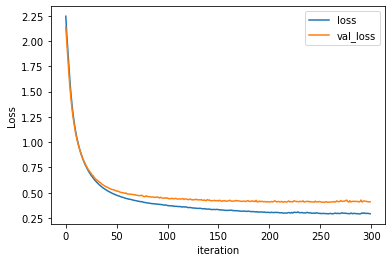

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

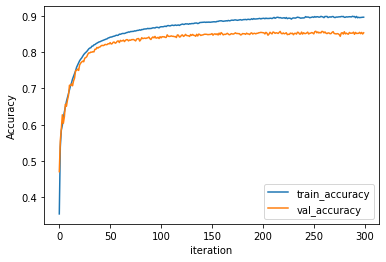

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()